<a href="https://colab.research.google.com/github/MuhammadFanik/Data-Science-Projects/blob/main/Diabetes_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
df = pd.read_csv("diabetes.csv")
# Data Overview
df.sample(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
535,4,132,0,0,0,32.9,0.302,23,1
12,10,139,80,0,0,27.1,1.441,57,0
17,7,107,74,0,0,29.6,0.254,31,1
197,3,107,62,13,48,22.9,0.678,23,1
564,0,91,80,0,0,32.4,0.601,27,0


In [ ]:
df.shape

(768, 9)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
# Summary Stats
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## Null Values

In [ ]:
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [ ]:
# Check how many 0 values are there in the predictors

# Make a copy of the dataframe
df_copy = df.copy()

# Get the column names
print(df_copy.columns)

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


In [ ]:
df_copy[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']] = df_copy[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']].replace(to_replace=0, value=np.nan)

In [ ]:
# Check for missing values after replacing 0 with np.nan
df_copy.isnull().sum()

,0
Pregnancies,111
Glucose,5
BloodPressure,35
SkinThickness,227
Insulin,374
BMI,11
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [ ]:
# Check for percentages of missing value
(df_copy.isnull().sum() / len(df_copy)) * 100

,0
Pregnancies,14.453125
Glucose,0.651042
BloodPressure,4.557292
SkinThickness,29.557292
Insulin,48.697917
BMI,1.432292
DiabetesPedigreeFunction,0.000000
Age,0.000000
Outcome,0.000000


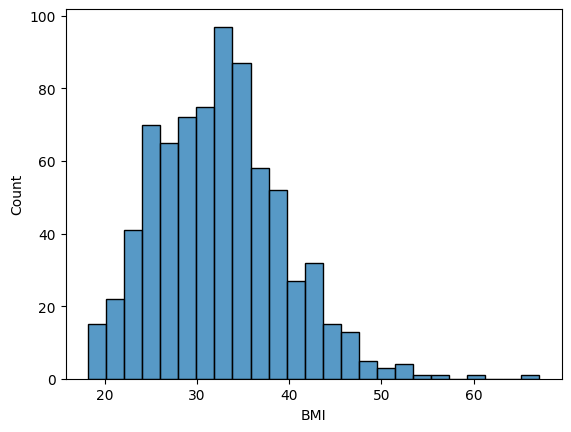

In [ ]:
sns.histplot(data=df_copy, x="BMI")
plt.show()

# Since Pregnancies feature is skewed, I will replace 0 values with the median
# Insulin --> Skewed --> Median

# Glucose --> Kind of normal distribution --> replace with mean
# BloodPressure --> Kind of normal distribution --> replace with mean
# SkinThickness --> Kind of normal distribution --> replace with mean
# BMI --> Normal --> Mean

In [ ]:
# Replace the missing values
df["Pregnancies"] = df["Pregnancies"].replace(0, df["Pregnancies"].median())
df["Insulin"] = df["Insulin"].replace(0, df["Insulin"].median())

df["Glucose"] = df["Glucose"].replace(0, df["Glucose"].mean())
df["BloodPressure"] = df["BloodPressure"].replace(0, df["BloodPressure"].mean())
df["SkinThickness"] = df["SkinThickness"].replace(0, df["SkinThickness"].mean())
df["BMI"] = df["BMI"].replace(0, df["BMI"].mean())

## Split the data

In [ ]:
# Separating the data into input and output columns
X = df.drop(labels="Outcome", axis=1)
y = df["Outcome"]

In [ ]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.000000,30.5,33.6,0.627,50
1,1,85.0,66.0,29.000000,30.5,26.6,0.351,31
2,8,183.0,64.0,20.536458,30.5,23.3,0.672,32
3,1,89.0,66.0,23.000000,94.0,28.1,0.167,21
4,3,137.0,40.0,35.000000,168.0,43.1,2.288,33


In [ ]:
y.head()

,Outcome
0,1
1,0
2,1
3,0
4,1


In [ ]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=10)

## Sklearn Pipeline

In [ ]:
# Pipeline for Logistic Regression
pipeline_lor = Pipeline(
    [("StandardScaler1", StandardScaler()),
     ("lor_clf", LogisticRegression())])
pipeline_lor

Pipeline(steps=[('StandardScaler', StandardScaler()),
                ('lor_clf', LogisticRegression())])

In [ ]:
# Piepline for KNN
pipeline_knn = Pipeline(
    [("StandardScaler2", StandardScaler()),
     ("knn_clf", KNeighborsClassifier())]
)
pipeline_knn

Pipeline(steps=[('StandardScaler2', StandardScaler()),
                ('knn_clf', KNeighborsClassifier())])

In [ ]:
# Pipeline for SVC
pipeline_svc = Pipeline([
    ("StandardScaler3", StandardScaler()),
    ("svc_clf", SVC())
])
pipeline_svc

Pipeline(steps=[('StandardScaler3', StandardScaler()), ('svc_clf', SVC())])

In [ ]:
# Decision Tree Pipeline
dt_pipeline = Pipeline([
    ("dt_clf", DecisionTreeClassifier())
])
dt_pipeline

Pipeline(steps=[('dt_clf', DecisionTreeClassifier())])

In [ ]:
# Random Forest Pipeline
rf_pipeline = Pipeline([
    ("rf_clf", RandomForestClassifier())
])
rf_pipeline

Pipeline(steps=[('rf_clf', RandomForestClassifier())])

In [ ]:
# Gradient Boosting Pipeline
gb_pipeline = Pipeline([
    ("gb_clf", GradientBoostingClassifier())
])
gb_pipeline

Pipeline(steps=[('gb_clf', GradientBoostingClassifier())])

In [ ]:
pipelines = [pipeline_lor, pipeline_knn, pipeline_svc, dt_pipeline, rf_pipeline, gb_pipeline]

In [ ]:
# Training Pieplines
for pipe in pipelines:
  pipe.fit(X_train, y_train)

In [ ]:
pipe_dict = {0: "LOR", 1: "KNN", 2: "SVC", 3: "DT", 4: "RF", 5: "GBC"}
pipe_dict

{0: 'LOR', 1: 'KNN', 2: 'SVC', 3: 'DT', 4: 'RF', 5: 'GBC'}

In [ ]:
# Accuracy of models
for i, model in enumerate(pipelines):
  print(f"Test Accuracy {pipe_dict[i]}: {model.score(X_test, y_test) * 100}")

# Gradient Boosting is giving the best accuracy

Test Accuracy LOR: 73.95833333333334
Test Accuracy KNN: 68.22916666666666
Test Accuracy SVC: 72.39583333333334
Test Accuracy DT: 68.22916666666666
Test Accuracy RF: 73.95833333333334
Test Accuracy GBC: 78.125


## Train Gradient Boosting on the entire dataset

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
X = df.drop(labels="Outcome", axis=1)
y = df["Outcome"]

In [ ]:
gbc1 = GradientBoostingClassifier()

In [ ]:
# For production purposes, we have to train our model on the entire dataset. Train/Test splits are done to check the performance on different models
gbc1.fit(X, y)

GradientBoostingClassifier()

## Predict on new Data

In [ ]:
new_data = pd.DataFrame({
    "Pregnancies": 6,
    "Glucose": 148,
    "BloodPressure": 72,
    "SkinThickness": 35,
    "Insulin": 79.799479,
    "BMI": 33.6,
    "DiabetesPedigreeFunction": 0.627,
    "Age": 50
}, index=[0])

In [ ]:
# This model predicts that for the given data, the patient is diabetic
pred = gbc1.predict(new_data)

In [ ]:
if pred[0] == 0:
  print("Patient is non-diabetic")
else:
  print("Patient is diabetic")

Patient is diabetic


## Save Model using Joblib

In [ ]:
import joblib
joblib.dump(gbc1, "model_joblib_diabetes")

['model_joblib_diabetes']

In [ ]:
my_model = joblib.load("model_joblib_diabetes")

In [ ]:
my_model.predict(new_data)

array([1])